# Exercício 7

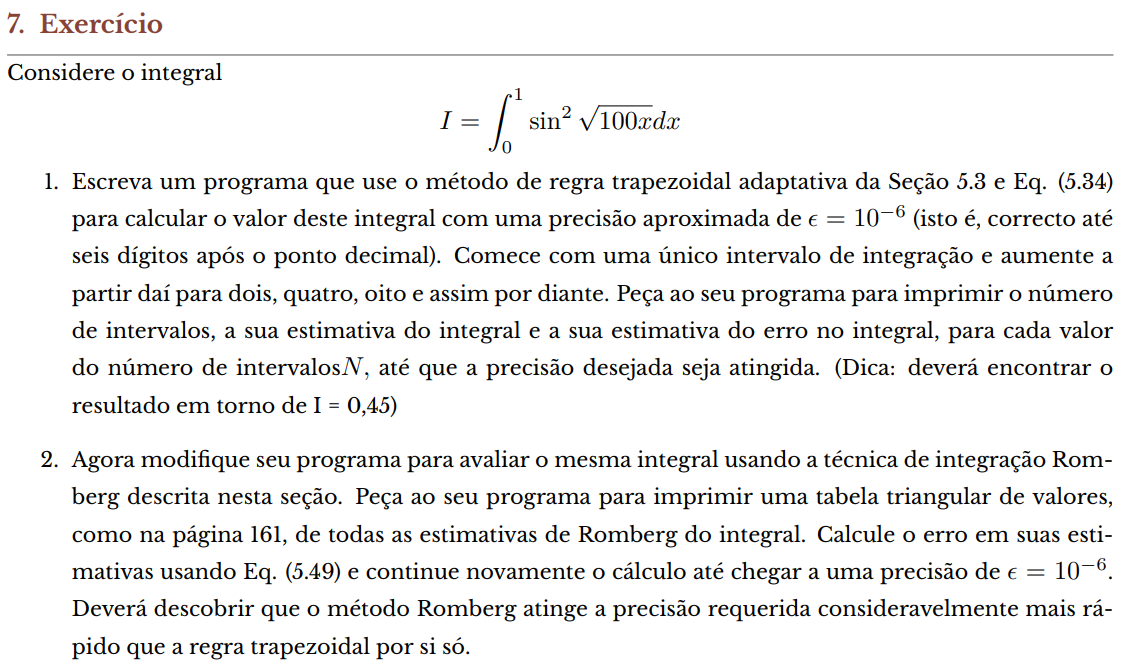

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable


def f(x: np.ndarray):
    return (np.sin(np.sqrt(100 * x)))**2

## Alínea 1

[Ver mais](https://www.notion.so/guilhermebaos/5-M-todos-Adaptativos-e86e5506baab4c5dbc73224f58e0af6c?pvs=4).

In [17]:
def trapezio_adaptativo(start: float, end: float, func: Callable, eps=1e-6) -> float:
    # Integral para N = 1
    I1 = (end - start) * (func(start) + func(end)) / 2

    # Aumentar N em potências de 2
    N = 2

    # Usar o método adaptativo
    erro = eps + 1
    while abs(erro) > abs(eps):
        # Calcular o próximo integral
        h = (end - start) / N
        xx = start + np.arange(1, N, 2) * h
        ff = func(xx)

        I2 = I1 / 2 + h * ff.sum()

        # Estimar o erro
        erro = (I2 - I1) / 3

        print(f"Para N = {N} o valor do integral é {I2} e o erro é cerca de {erro}")

        # O I2 atual é o próximo I1
        I1 = I2
        N *= 2
    
    return I2

In [18]:
I = trapezio_adaptativo(0, 1, f)

Para N = 2 o valor do integral é 0.3252319078064746 e o erro é cerca de 0.05908414108660753
Para N = 4 o valor do integral é 0.5122828507233315 e o erro é cerca de 0.06235031430561896
Para N = 8 o valor do integral é 0.4029974484782483 e o erro é cerca de -0.03642846741502772
Para N = 16 o valor do integral é 0.430103369294747 e o erro é cerca de 0.009035306938832902
Para N = 32 o valor do integral é 0.44841466578746997 e o erro é cerca de 0.0061037654975743165
Para N = 64 o valor do integral é 0.4539129312153759 e o erro é cerca de 0.0018327551426353117
Para N = 128 o valor do integral é 0.45534850437280217 e o erro é cerca de 0.000478524385808754
Para N = 256 o valor do integral é 0.4557112664532411 e o erro é cerca de 0.00012092069347964991
Para N = 512 o valor do integral é 0.45580219965166413 e o erro é cerca de 3.0311066141005167e-05
Para N = 1024 o valor do integral é 0.4558249481324202 e o erro é cerca de 7.58282691868765e-06
Para N = 2048 o valor do integral é 0.45583063620164

Podemos ver que no último passo de facto apenas alteramos a nossa estimativa a partir da 6ª casa decimal.

## Alínea 2

[Ver mais](https://www.notion.so/guilhermebaos/6-M-todo-de-Romberg-f0788307bb564fdca7f74fa58e77ad6f?pvs=4).

Para guardar os valores de $R_{i, j}$ usei uma matriz, pelo que começo a contar do 0. Assim $R_{i, j}$ é um método de ordem $h^{2(j+1)}$ em vez de $h^{2j}$ como está nos apontamentos.

As expressões necessárias ficam então:

$$
\begin{align*}
R_{i, j+1} &= R_{i, j} + \frac1{4^{j+1} - 1}(R_{i, j} - R_{i-1, j})
\\\\
\text{Erro}_{i, j+1} &= \frac1{4^{j+1} - 1}(R_{i, j} - R_{i-1, j})
\end{align*}
$$

In [58]:
def romberg(start: float, end: float, func: Callable, eps=1e-6) -> float:
    # Matriz com todos os R_{i, j}
    RR = [[]]

    # Calcular R_{0, 0}
    RR[0] += [(end - start) * (func(start) + func(end)) / 2]

    # Aumentar N em potências de 2
    N = 2

    # Queremos calcular R_{i, i}
    i = 1

    # Usar o método de Romberg
    erro = eps + 1
    while abs(erro) > abs(eps):
        # Guardar R_{i, j}
        RR += [[]]

        # Calcular R_{i, 1}
        h = (end - start) / N
        xx = start + np.arange(1, N, 2) * h
        ff = func(xx)

        RR[i] += [RR[i-1][0] / 2 + h * ff.sum()]


        # Calcular R_{i, j+1}, pelo que j+1 vai de 1 até i 
        for j in range(0, i):
            RR[i] += [RR[i][j] + (RR[i][j] - RR[i-1][j]) / (4**(j+1) - 1)]
        
        # Estimar o erro de R_{i, i}
        erro = (RR[i][i-1] - RR[i-1][i-1]) / (4**i-1)

        print(f"Para N = {N} o valor do integral é {RR[i][i]} e o erro é cerca de {erro}")

        # Aumentar i e N
        i += 1
        N *= 2
    
    return RR[i-1][i-1]

In [59]:
I = romberg(0, 1, f)

Para N = 2 o valor do integral é 0.38431604889308213 e o erro é cerca de 0.05908414108660753
Para N = 4 o valor do integral é 0.5873209727713417 e o erro é cerca de 0.012687807742391222
Para N = 8 o valor do integral é 0.34897386185747614 e o erro é cerca de -0.003724173608029149
Para N = 16 o valor do integral é 0.4458037647108328 e o erro é cerca de 0.00037824180802092434
Para N = 32 o valor do integral é 0.455777492231097 e o erro é cerca de 9.739968281508006e-06
Para N = 64 o valor do integral é 0.45583249446137875 e o erro é cerca de 1.3428278877383781e-08
